In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im = plt.imread("response_matrix.png")
ims = plt.imread("response_matrix_slices1.png")
ims2 = plt.imread("response_matrix_slices2.png")

In [3]:
def recta(x1,y1,x2,y2):
    m = (y2-y1)/(x2-x1)
    return (m,y2-m*x2)

recta(4,1.15,7,1.022)

(-0.04266666666666663, 1.3206666666666664)

In [4]:
def gaussian(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/sig**2)

def mid(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-np.abs(x-mu)**3/sig**3)

def sharp(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**4/sig**4)    

def reconstruct_matrix_function(etrue,erec):
    mu1 = -0.84082 + 0.99172*etrue
    mu2 = -1.48036 + 1.06333*etrue
    sig1 = 0.025*etrue + 0.09
    sig2 = 0.055*etrue + 0.08
    factor = (0.055*etrue + 0.08)/0.4
    return np.maximum(gaussian(erec,mu1,sig1),factor*gaussian(erec,mu2,sig2))

def rec(etrue,erec):
    mu1 = -0.84082 + 0.99172*etrue
    mu2 = -1.48036 + 1.06333*etrue
    sig1 = 0.025*etrue + 0.09
    sig2 = 0.055*etrue + 0.08
    sig2 = 0.055*etrue + 0.033
    factor_g = (0.055*etrue + 0.08)/0.4
    factor_g = (0.055*etrue + 0.035)/0.4
    factor_s = (0.025*etrue + 0.85)
    cut = -0.042*etrue + 1.3206
    if erec > mu1+1.5*sig1:
        return 0.
    elif erec > etrue - 1.022:
        return factor_s*gaussian(erec,mu1,sig1)
    elif erec > etrue -cut:
        return factor_g*gaussian(etrue-cut,mu2,sig2)+0.01
    else:
        return factor_g*gaussian(erec,mu2,sig2)+0.01
    

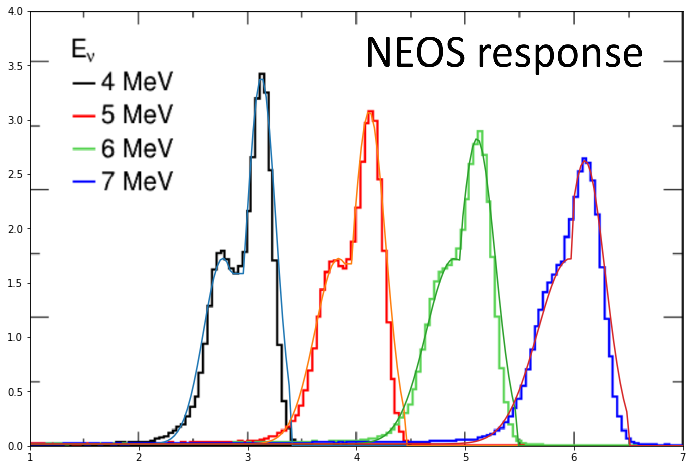

In [5]:
plt.figure(figsize=(16,8))
plt.imshow(ims,extent=[1,7,0,4])
x = np.linspace(1,7,200)
y = np.array([1.7*rec(4,i) for i in x])
y5 = np.array([1.7*rec(5,i) for i in x])
y6 = np.array([1.7*rec(6,i) for i in x])
y7 = np.array([1.7*rec(7,i) for i in x])
plt.plot(x,y)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.axis([1,7,0,4])
plt.show()

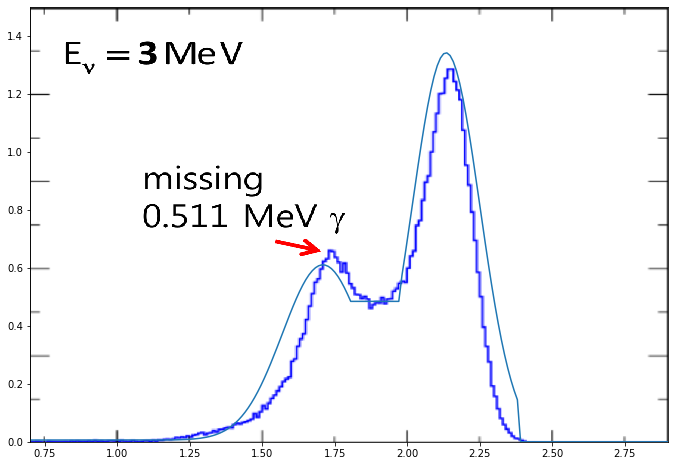

In [6]:
plt.figure(figsize=(16,8))
plt.imshow(ims2,extent=[0.7,2.9,0,1.5])
x = np.linspace(0.7,2.9,200)
y = np.array([0.6*rec(3,i) for i in x])
plt.plot(x,y)
plt.axis([0.7,2.9,0,1.5])
plt.show()

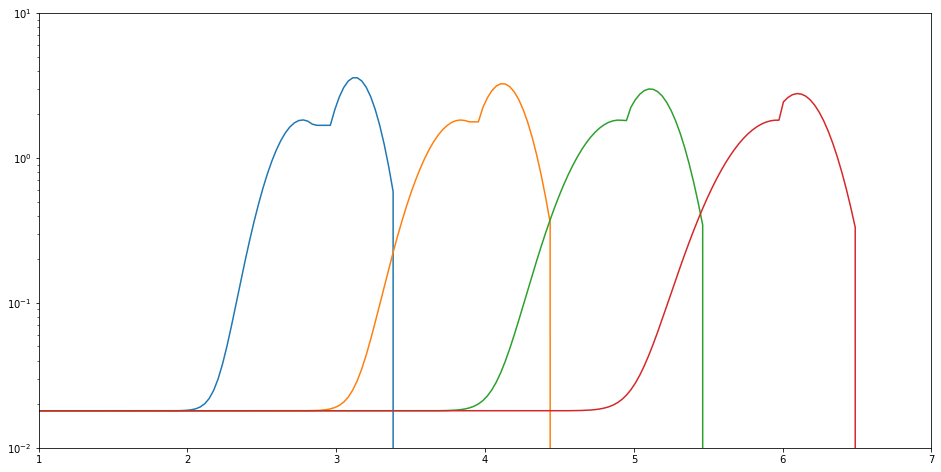

In [7]:
plt.figure(figsize=(16,8))
x = np.linspace(1,7,200)
y = np.array([1.8*rec(4,i) for i in x])
y5 = np.array([1.8*rec(5,i) for i in x])
y6 = np.array([1.8*rec(6,i) for i in x])
y7 = np.array([1.8*rec(7,i) for i in x])
plt.plot(x,y)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.yscale('log')
plt.axis([1,7,0.01,10])
plt.show()

<ipython-input-8-d6f1db834ee1>:6: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(x,y,np.log10(z))


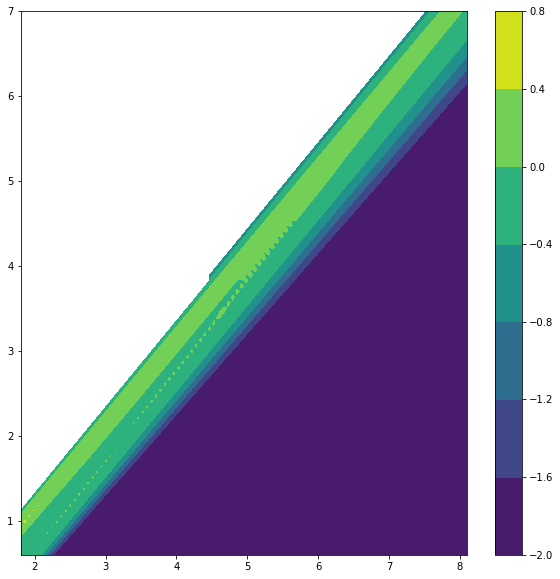

In [8]:
plt.figure(figsize=(10,10))
x = np.linspace(1.8,8.1,100)
y = np.linspace(0.6,7,100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.array([[rec(ix,iy) for ix in x] for iy in y])
plt.contourf(x,y,np.log10(z))
plt.colorbar()
plt.show()

In [19]:
x = np.arange(0, 12, 0.05)
y = np.arange(0, 12, 0.05)
z = np.array([[rec(ix,iy) for ix in x] for iy in y])

In [45]:
np.savetxt("ReconstructMatrix.dat",z/20.062665,delimiter=",")

In [43]:
print(np.sum(z)/211.4001458354831)
print(np.sum(z)/20.062665)

20.062665741974733
211.40015365366511


In [44]:
z2 = z/20.062665
print(z2.shape)
total_row = 0.0
total_col = 0.0
count = 0
for i in range(len(z2)):
    total_row += np.sum(z2[i])
    total_col += np.sum(z2[:,i])
    count += 1
total_row /= count
total_col /= count

print(total_row,total_col)
norm = (total_row+total_col)/2.
print(norm)


(240, 240)
0.8808339735569386 0.8808339735569384
0.8808339735569385
